In [ ]:
E, E2,metropolis(N=10000, alpha=0.3)

(np.float64(-2.8791932709073533),
 np.float64(8.376772112799546),
 np.float64(1.2860836642997309),
 np.float64(-0.43418552485844264),
 0.3985999999999724)

Alpha:  0 <E>:  -2.8402606395484704 VarE:  0.252924052095409 ratio =  0.36549999999997607
Alpha:  0.31316851365905585 <E>:  -2.850478918047083 VarE:  0.07871231883587093 ratio =  0.40379999999997185
Alpha:  0.2879221183200955 <E>:  -2.872241762946621 VarE:  0.08798347415647712 ratio =  0.4048999999999717
Alpha:  0.25690327920175693 <E>:  -2.869166108290923 VarE:  0.08517901057123822 ratio =  0.39729999999997256
Alpha:  0.2265544735579048 <E>:  -2.901151307170916 VarE:  0.08520237465958047 ratio =  0.3887999999999735
Alpha:  0.20180961999831326 <E>:  -2.8770637380341015 VarE:  0.09626993570992859 ratio =  0.38919999999997346
Alpha:  0.18212613431242852 <E>:  -2.882345704694405 VarE:  0.10011341488916514 ratio =  0.38929999999997345
Alpha:  0.17318265726462978 <E>:  -2.926906703876504 VarE:  0.09495785536423895 ratio =  0.3795999999999745
Alpha:  0.1690242216108746 <E>:  -2.8811470864909774 VarE:  0.10326587924178021 ratio =  0.38179999999997427
Alpha:  0.16564872963982413 <E>:  -2.87704

Text(0, 0.5, 'Energy')

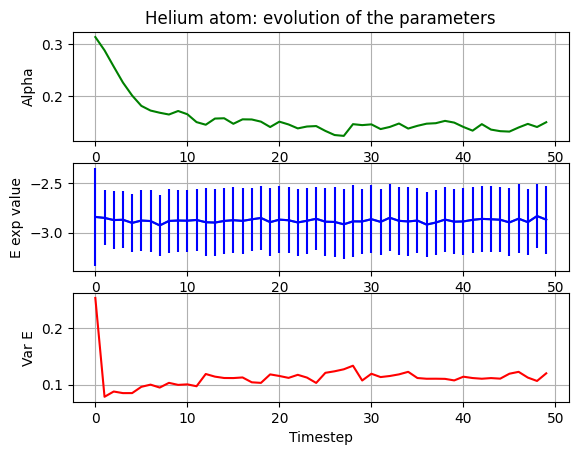

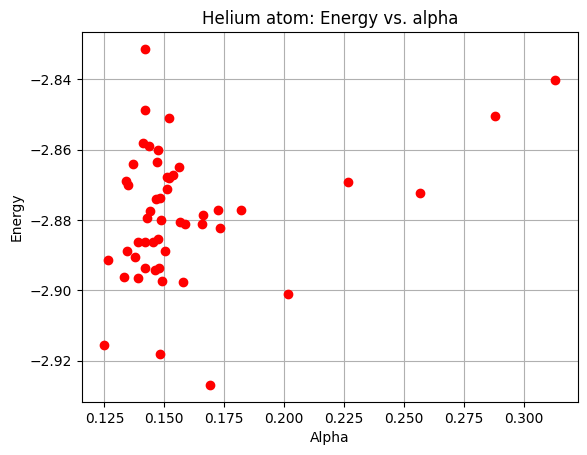

In [ ]:
import numpy as np
from vmc import VMC
from trial_wavefunctions import helium_1_param


psi = helium_1_param

'''Initial parameters'''
alpha = 0
alpha_iterations = 50
N_metropolis = 10000
random_walkers = 1
gamma = 0.5

energy_plot = np.array([])
alpha_plot = np.array([])
variance_plot = np.array([])

for i in range(alpha_iterations):
    
    sim = VMC(alpha, psi)
    E = 0
    E2 = 0
    dE_dalpha = 0
    Eln = 0
    ln = 0
    rejection_ratio = 0
    alpha_step = 0.01

    for j in range(random_walkers): #We use more than one random_walkers in case one gets stuck at some X
        E_met, E2_met, Eln_met, ln_met, rejections_met = sim.metropolis(N_metropolis, alpha)
        E += E_met/random_walkers
        E2 += E2_met/random_walkers
        Eln += Eln_met/random_walkers
        ln += ln_met/random_walkers
        rejection_ratio += rejections_met/random_walkers 

    '''Define next alpha'''
    dE_dalpha = 2 * (Eln - E * ln)
    print('Alpha: ', alpha, '<E>: ', E, 'VarE: ', E2 - E **2, 'ratio = ', rejection_ratio)
    #alpha = alpha + alpha_step
    alpha = alpha - gamma * dE_dalpha

    '''Plot'''    
    energy_plot = np.append(energy_plot, E)
    alpha_plot = np.append(alpha_plot, alpha)
    variance_plot = np.append(variance_plot, E2-E**2)


fig1 = plt.figure()

ax1 = fig1.add_subplot(311)
plt.title('Helium atom: evolution of the parameters')
plt.grid()
ax1.plot(alpha_plot, 'g')
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Alpha')

ax2 = fig1.add_subplot(312)
plt.grid()
ax2.plot(energy_plot)
ax2.set_xlabel('Timestep')
ax2.set_ylabel('E exp value')
ax2.errorbar(range(len(energy_plot)), energy_plot, yerr=np.sqrt(variance_plot), c='b')

ax3 = fig1.add_subplot(313)
plt.grid()
ax3.plot(variance_plot, 'r')
ax3.set_xlabel('Timestep')
ax3.set_ylabel('Var E')

fig2 = plt.figure()
ax4 = fig2.add_subplot(111)
plt.title('Helium atom: Energy vs. alpha')
plt.grid()
ax4.plot(alpha_plot, energy_plot, 'ro')
ax4.set_xlabel('Alpha')
ax4.set_ylabel('Energy')

In [5]:
variance_plot

array([0.26169644, 0.16749203, 0.13576173, 0.11401395, 0.09758893,
       0.09362289, 0.09001544, 0.08058654, 0.09196959, 0.07865547,
       0.09978588, 0.10680736])

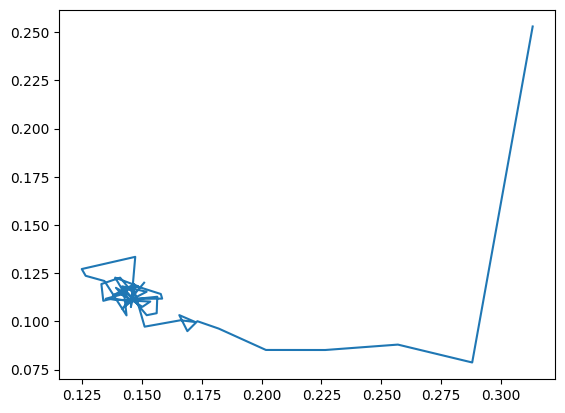

In [19]:
plt.plot(alpha_plot, variance_plot)

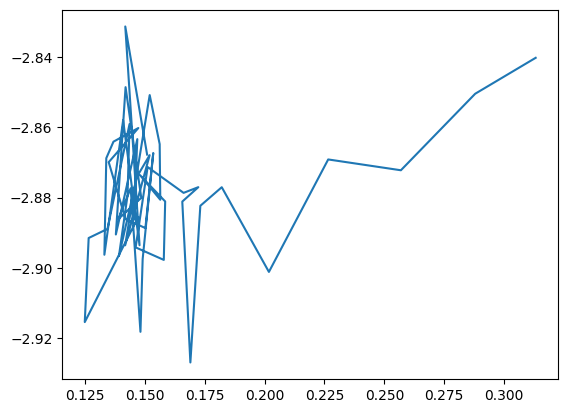

In [20]:
plt.plot(alpha_plot, energy_plot)